# **Lab 02:** Creating your own CNN with PyTorch

### **General Instructions**

- In this lab, you'll create your own CNN in order to surpass an accuracy of 70% on CIFAR-10.

### **System Diagram Requirement**

You must include a **diagram of your system pipeline** showing the CNN architecture.

This diagram is **required** to understand your model logic.

You can draw it digitally, use any Pyhton library, or by hand and include an image.

If your diagram was created assisted by GenAI, also include the `promt` used in the next block. If the generated system diagram is not clear or you cannot interpret it, adjust the prompt as needed or draw it by hand.

Genera un diagrama detallado de la arquitectura CNN para CIFAR-10 mediante el uso de Graphviz, mostrando todo el flujo del sistema.

### **Load the CIFAR-10 dataset**

In [20]:
# Load the CIFAR-10 dataset here
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

classes = train_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### **Create your CNN with PyTorch and train it on the CIFAR-10 dataset**

In [4]:
import torch.nn as nn
import torch.optim as optim
import torch

# Create your own CNN using PyTorch and train it on the CIFAR-10 dataset
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # Input channels = 3 (RGB), output channels = 16, kernel size = 3
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # Input channels = 16, output channels = 32, kernel size = 3
        self.pool = nn.MaxPool2d(2, 2) # Kernel size = 2, stride = 2
        self.fc1 = nn.Linear(32 * 8 * 8, 128) # Input features = 32*8*8, output features = 128
        self.fc2 = nn.Linear(128, 10) # Input features = 128, output features = 10 (number of classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/5, Loss: 1.5875
Epoch 2/5, Loss: 1.2379
Epoch 3/5, Loss: 1.1013
Epoch 4/5, Loss: 1.0053
Epoch 5/5, Loss: 0.9257


In [8]:
from sklearn.metrics import accuracy_score

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

cnn_acc = accuracy_score(all_labels, all_preds)
print("CNN Accuracy:", cnn_acc)

CNN Accuracy: 0.6482


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # ===== CONVOLUTIONAL LAYERS =====
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)

        # ===== FULLY CONNECTED =====
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Conv Layer 1
        x = self.pool(self.relu(self.bn1(self.conv1(x))))  # 32x32 → 16x16

        # Conv Layer 2
        x = self.pool(self.relu(self.bn2(self.conv2(x))))  # 16x16 → 8x8

        # Conv Layer 3
        x = self.pool(self.relu(self.bn3(self.conv3(x))))  # 8x8 → 4x4

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)

        return x


# ===== TRAINING SETUP =====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### **Evaluate the accuracy of your CNN (must be >= 70%)**

In [22]:
# Evaluate the accuracy of your CNN (must be >= 70%)
num_epochs = 5
train_losses = [] # Initialize list to store training losses

for epoch in range(num_epochs):
    running_loss = 0.0

    model.train()

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Reset gradients
        optimizer.zero_grad()

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprop
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss/len(train_loader)
    train_losses.append(epoch_loss) # Store the loss for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/5], Loss: 1.4261
Epoch [2/5], Loss: 1.0822
Epoch [3/5], Loss: 0.9420
Epoch [4/5], Loss: 0.8480
Epoch [5/5], Loss: 0.7803


In [24]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 75.37%


### **System Diagram**

Insert your system diagram below (image or drawing). It must clearly show:

- Number of convolutional layers  
- Kernel size(s)
- Pooling layers (if any)  
- etc..  

In [30]:
import graphviz

dot_code = '''
digraph CNN_CIFAR10 {

    rankdir=LR;
    node [shape=box, style=filled, color=lightblue, fontname="Arial"];

    Input [label="Input Image\n3x32x32"];

    Conv1 [label="Conv1\n3→32\n3x3 + BN + ReLU"];
    Pool1 [label="MaxPool\n16x16"];

    Conv2 [label="Conv2\n32→64\n3x3 + BN + ReLU"];
    Pool2 [label="MaxPool\n8x8"];

    Conv3 [label="Conv3\n64→128\n3x3 + BN + ReLU"];
    Pool3 [label="MaxPool\n4x4"];

    Flatten [label="Flatten\n128×4×4 = 2048"];

    FC1 [label="FC1\n2048 → 256\nReLU + Dropout"];

    FC2 [label="Output Layer→ 10 classes"];

    Input -> Conv1 -> Pool1 -> Conv2 -> Pool2 -> Conv3 -> Pool3 -> Flatten -> FC1 -> FC2;
}
'''

# Crear el grafo
graph = graphviz.Source(dot_code)

# Guardar como PNG
graph.render("cnn_cifar10_architecture", format="png", cleanup=True)

'cnn_cifar10_architecture.png'

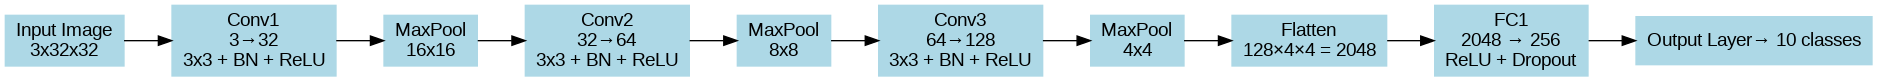

### **Written Analysis Questions**

**1. Why increasing depth could improve performance.**

Increasing depth allows the network to learn a feature hierarchy. Early layers capture low-level features like edges and textures, while deeper layers compose these into high-level abstractions and complex object parts

**2. Under what conditions deeper networks may hurt performance.**

Deep networks can suffer from the vanishing gradient problem, where error signals become too small during backpropagation to update the initial layers. Furthermore, if the network is too deep for the complexity of the data, it may lead to "degradation," where accuracy plateaus or decreases, and it becomes significantly more prone to overfitting on the training set

**3. How could dropout, batch normalization, or data augmentation help?**

Batch Normalization: Stabilizes training by normalizing layer inputs, allowing for higher learning rates and faster convergence.
**4. How would you determine whether your CNN is overfitting or underfitting?**

I would compare the training and validation/test accuracy curves. Overfitting is identified when training accuracy is very high but test accuracy is significantly lower or begins to drop. Underfitting occurs when both training and test accuracies remain low, suggesting the model is not complex enough to capture the data patterns.

**5. Which architectural components most impact computational cost?**

The Convolutional Layers (specifically those with a high number of filters and large kernel sizes) consume the most FLOPs (floating-point operations) during the forward and backward pass. Additionally, the first Fully Connected (Dense) layer after flattening usually contains the vast majority of the model's total parameters.

**6. Whether the accuracy gain justifies the added complexity in a real-world deployment scenario.**

This depends on the application context:
In high-stakes domains (medical imaging, autonomous driving, fraud detection), even small accuracy improvements can justify increased complexity.
In resource-constrained environments (mobile devices, embedded systems), simpler models may be preferred due to lower latency and energy consumption.

## **Grading Rubric (10 points)**

| Criterion | Points |
|------------|--------|
| **Baseline Reproduction** – Correct implementation and training of the provided baseline CNN. Clear report of baseline accuracy and training setup. | 1 |
| **Architectural Modifications** – Meaningful and technically justified changes to the CNN architecture (e.g., depth, kernel size, normalization, dropout, residual connections). Changes must go beyond trivial parameter tuning. | 2 |
| **Written Architectural Justification** – Clear explanation of *why* the chosen modifications should improve performance (receptive field, feature hierarchy, regularization, gradient flow, etc.). | 2 |
| **Experimental Design & Comparison** – Systematic comparison between baseline and modified model (same dataset split, controlled variables, reported metrics). Includes training/validation accuracy curves. | 2 |
| **Performance Improvement** – Modified architecture surpasses baseline validation/test accuracy. <br>• +1% improvement: 0.5 pts <br>• +2% improvement: 1 pt | 1 |
| **Generalization Analysis** – Discussion of overfitting/underfitting behavior and the role of regularization techniques (BatchNorm, Dropout, data augmentation, etc.). | 1 |
| **Computational Tradeoff Reflection** – Analysis of parameter count, training time, and whether the accuracy gain justifies the added complexity. | 1 |
| **Code Clarity & PyTorch Best Practices** – Clean modular implementation (proper use of `nn.Module`, readable forward pass, reproducibility practices). | 1 |
| **Total** | **10** |

---

### Notes

- Simply increasing the number of filters without justification will not receive full architectural credit.
- Accuracy alone does not guarantee a high grade — reasoning and analysis are weighted heavily.
- Extra credit (+0.5) may be awarded for implementing advanced concepts (e.g., residual blocks, learning rate scheduling experiments, or ablation studies). Applies just for students with <10 points.

---

<p style="text-align: right; font-size:14px; color:gray;">
<b>Prepared by:</b><br>
Manuel Eugenio Morocho-Cayamcela
</p>